# Flight Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

**Comment** : There are 10,683 flight records, and 11 features. <br>
- Airline: String (Flight company)
- Date of Journey (Date)
- Dep Time/ Arrival Time/ Duration (Flight time)
- Source/Destination/Route/ Total Stops (Flight path)
- Additional info
- Price (Target feature)
<br>

**According to me**: <br>
- Source and Destination is not required. It is covered in Route.
- The route needs to be converted into meaningful features.
- Total stops and Route are somewhat related
- Out of Dep Time/ Arrival Time and Duration, only two features are important. The third one is dependent on other two.
- Additional info is mostly a sparse feature

## Cleaning the data

### Step 1: Missing values

In [5]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

**Comment** : We find that there are missing values in **Route** and **Total_Stops**

In [6]:
data.loc[data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
#Checking what are the values that the Total_Stops take
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [8]:
#Filling the missing value
data.loc[data["Total_Stops"].isnull(),"Total_Stops"] = "non-stop"

In [9]:
#Checking missing values again
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [10]:
#Checking missing values in Route
data.loc[data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,non-stop,No info,7480


In [11]:
#Checking what are the values that the Route take
data["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
DEL → BHO → BOM → COK                  50
CCU → BBI → BLR                        50
CCU → IXR → DEL → BLR             

In [12]:
#Filling the missing value
data.loc[data["Route"].isnull(),"Route"] = "DEL → COK"

## Step 2: Data Formatting

- Airline: Nominal Categorical
- Date_of_Journey: Numerical
- Source/Destination/Route: Nominal Categorical
- Dep Time/ Arrival Time/ Duration : Numerical
- Total_Stops: Ordinal Categorical
- Addditional info: Nominal Categorical

### 2.1 Mapping Ordinal feature: Total Stops

In [13]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
stops_map = {"non-stop": 0,
             "1 stop": 1,
             "2 stops": 2,
             "3 stops": 3,
             "4 stops": 4}

In [15]:
data["Total_Stops"] = data["Total_Stops"].map(stops_map)

In [16]:
data["Total_Stops"].value_counts()

1    5625
0    3492
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

### 2.2 Making sense out of Source, Destination and Route features

In [17]:
route_df = data["Route"].str.split("→")

In [18]:
route_df

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
5                      [CCU ,  BLR]
6               [BLR ,  BOM ,  DEL]
7               [BLR ,  BOM ,  DEL]
8               [BLR ,  BOM ,  DEL]
9               [DEL ,  BOM ,  COK]
10              [DEL ,  BLR ,  COK]
11                     [CCU ,  BLR]
12                     [MAA ,  CCU]
13              [CCU ,  BOM ,  BLR]
14                     [CCU ,  BLR]
15       [DEL ,  AMD ,  BOM ,  COK]
16              [DEL ,  PNQ ,  COK]
17              [DEL ,  BOM ,  COK]
18       [DEL ,  CCU ,  BOM ,  COK]
19              [DEL ,  BOM ,  COK]
20              [DEL ,  BOM ,  COK]
21              [BLR ,  COK ,  DEL]
22                     [BLR ,  DEL]
23                     [BLR ,  DEL]
24              [CCU ,  BOM ,  BLR]
25       [DEL ,  IDR ,  BOM ,  COK]
26              [DEL ,  LKO ,  COK]
27              [DEL ,  BOM 

In [19]:
route_df[100][1:-1]

[' BOM ']

**Comment**: Woahh! You can see how it worked as desired! <br>
You can find str.split() function in pandas here. <br>

In [20]:
route_df.head()

0                  [BLR ,  DEL]
1    [CCU ,  IXR ,  BBI ,  BLR]
2    [DEL ,  LKO ,  BOM ,  COK]
3           [CCU ,  NAG ,  BLR]
4           [BLR ,  NAG ,  DEL]
Name: Route, dtype: object

In [21]:
for index in data.index:
    data.loc[index, "Source"] = route_df[index][0].strip()
    data.loc[index, "Destination"] = route_df[index][-1].strip()
    del route_df[index][0]
    del route_df[index][-1]

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,DEL,COK,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,CCU,BLR,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,BLR,DEL,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [23]:
route_df.head()

0                []
1    [ IXR ,  BBI ]
2    [ LKO ,  BOM ]
3           [ NAG ]
4           [ NAG ]
Name: Route, dtype: object

In [24]:
route_df = route_df.apply(pd.Series)

In [25]:
route_df.rename({0:'Stop_1', 1:'Stop_2', 2:'Stop_3', 3:'Stop_4'}, axis = 'columns', inplace = True)

In [26]:
route_df.head()

,Stop_1,Stop_2,Stop_3,Stop_4
0,NaN,NaN,NaN,NaN
1,IXR,BBI,NaN,NaN
2,LKO,BOM,NaN,NaN
3,NAG,NaN,NaN,NaN
4,NAG,NaN,NaN,NaN


In [27]:
data.drop(labels=['Route'], axis= 'columns', inplace=True)

In [28]:
new_data = pd.concat([data, route_df], axis =1)

In [29]:
new_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Stop_1,Stop_2,Stop_3,Stop_4
0,IndiGo,24/03/2019,BLR,DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,NaN,NaN,NaN,NaN
1,Air India,1/05/2019,CCU,BLR,05:50,13:15,7h 25m,2,No info,7662,IXR,BBI,NaN,NaN
2,Jet Airways,9/06/2019,DEL,COK,09:25,04:25 10 Jun,19h,2,No info,13882,LKO,BOM,NaN,NaN
3,IndiGo,12/05/2019,CCU,BLR,18:05,23:30,5h 25m,1,No info,6218,NAG,NaN,NaN,NaN
4,IndiGo,01/03/2019,BLR,DEL,16:50,21:35,4h 45m,1,No info,13302,NAG,NaN,NaN,NaN


### Comment: Source and Destination are Important Features than Intermediate Stops, hence kept them as seperate features.

### 2.3 Making sense out of Dep_time, Arrival_Time and Duration (One of the toughest task)

**Comment**: One of these features is redundant.

In [30]:
new_data["Dep_Time"]

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
5        09:00
6        18:55
7        08:00
8        08:55
9        11:25
10       09:45
11       20:20
12       11:40
13       21:10
14       17:15
15       16:40
16       08:45
17       14:00
18       20:15
19       16:00
20       14:10
21       22:00
22       04:00
23       18:55
24       18:55
25       21:25
26       21:50
27       07:00
28       09:45
29       07:05
         ...  
10653    14:05
10654    05:55
10655    02:55
10656    07:00
10657    20:00
10658    11:10
10659    21:00
10660    21:10
10661    13:00
10662    09:25
10663    19:30
10664    18:55
10665    15:15
10666    18:15
10667    22:55
10668    11:40
10669    08:00
10670    05:50
10671    21:05
10672    23:05
10673    13:25
10674    20:35
10675    06:20
10676    10:20
10677    05:55
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [31]:
new_data["Arrival_Time"]

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
5               11:25
6        10:25 13 Mar
7        05:05 02 Mar
8        10:25 13 Mar
9               19:15
10              23:00
11              22:55
12              13:55
13       09:20 10 May
14              19:50
15       19:15 04 Mar
16              13:15
17       12:35 13 Jun
18       19:15 13 Jun
19       12:35 28 May
20              19:20
21       13:20 19 Mar
22              06:50
23              21:50
24       08:15 07 May
25       12:35 10 Jun
26       03:35 02 Jun
27              12:55
28              12:35
29              09:20
             ...     
10653    12:00 02 May
10654           08:35
10655           04:20
10656           09:40
10657    09:20 07 May
10658           14:05
10659           23:50
10660    00:05 19 Mar
10661           19:15
10662    05:35 25 Mar
10663    12:35 07 Jun
10664           21:50
10665           17:45
10666    19:00 13 Jun
10667    2

In [32]:
new_data["Duration"]

0         2h 50m
1         7h 25m
2            19h
3         5h 25m
4         4h 45m
5         2h 25m
6        15h 30m
7         21h 5m
8        25h 30m
9         7h 50m
10       13h 15m
11        2h 35m
12        2h 15m
13       12h 10m
14        2h 35m
15       26h 35m
16        4h 30m
17       22h 35m
18           23h
19       20h 35m
20        5h 10m
21       15h 20m
22        2h 50m
23        2h 55m
24       13h 20m
25       15h 10m
26        5h 45m
27        5h 55m
28        2h 50m
29        2h 15m
          ...   
10653    21h 55m
10654     2h 40m
10655     1h 25m
10656     2h 40m
10657    13h 20m
10658     2h 55m
10659     2h 50m
10660     2h 55m
10661     6h 15m
10662    20h 10m
10663     17h 5m
10664     2h 55m
10665     2h 30m
10666    24h 45m
10667    21h 25m
10668     7h 20m
10669    11h 15m
10670    17h 25m
10671     1h 20m
10672    19h 55m
10673        15h
10674    24h 45m
10675     1h 20m
10676     8h 40m
10677     2h 40m
10678     2h 30m
10679     2h 35m
10680         

**Comment: As we can see,**
- Departure Time and Duration ae well formatted.
- However, Arrival Time is not well formatted. It would take a lot of time to clean it to make it usable.

In [33]:
#Converting Departure Time and Duration into datetime format
new_data["Dep_Time"] = pd.to_datetime(new_data["Date_of_Journey"]+ ' ' + new_data["Dep_Time"])

In [34]:
new_data["Dep_Time"]

0       2019-03-24 22:20:00
1       2019-01-05 05:50:00
2       2019-09-06 09:25:00
3       2019-12-05 18:05:00
4       2019-01-03 16:50:00
5       2019-06-24 09:00:00
6       2019-12-03 18:55:00
7       2019-01-03 08:00:00
8       2019-12-03 08:55:00
9       2019-05-27 11:25:00
10      2019-01-06 09:45:00
11      2019-04-18 20:20:00
12      2019-06-24 11:40:00
13      2019-09-05 21:10:00
14      2019-04-24 17:15:00
15      2019-03-03 16:40:00
16      2019-04-15 08:45:00
17      2019-12-06 14:00:00
18      2019-12-06 20:15:00
19      2019-05-27 16:00:00
20      2019-06-03 14:10:00
21      2019-03-21 22:00:00
22      2019-03-04 04:00:00
23      2019-01-05 18:55:00
24      2019-06-05 18:55:00
25      2019-09-06 21:25:00
26      2019-01-06 21:50:00
27      2019-05-15 07:00:00
28      2019-06-18 09:45:00
29      2019-06-15 07:05:00
                ...        
10653   2019-01-05 14:05:00
10654   2019-12-06 05:55:00
10655   2019-03-05 02:55:00
10656   2019-06-04 07:00:00
10657   2019-06-05 2

In [35]:
new_data.drop(labels=["Date_of_Journey", "Arrival_Time"], axis= 'columns', inplace = True)

In [36]:
new_data.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Stop_1,Stop_2,Stop_3,Stop_4
0,IndiGo,BLR,DEL,2019-03-24 22:20:00,2h 50m,0,No info,3897,NaN,NaN,NaN,NaN
1,Air India,CCU,BLR,2019-01-05 05:50:00,7h 25m,2,No info,7662,IXR,BBI,NaN,NaN
2,Jet Airways,DEL,COK,2019-09-06 09:25:00,19h,2,No info,13882,LKO,BOM,NaN,NaN
3,IndiGo,CCU,BLR,2019-12-05 18:05:00,5h 25m,1,No info,6218,NAG,NaN,NaN,NaN
4,IndiGo,BLR,DEL,2019-01-03 16:50:00,4h 45m,1,No info,13302,NAG,NaN,NaN,NaN


In [37]:
#TODO: Convert Duration to proper datetime format using regex and datetime functions

#TODO: Check contents of Additional_Info

#TODO: Seperate Price (y) and reemaing data (X)

#TODO: One Hot Encode these features: 'Airline', 'Additional_Info', 'Stop_<all>'

#Then the data will be ready to be used in any Regression model.

In [38]:
#Finding all numbers in a string
import re
duration_series = new_data["Duration"].str.findall(r'\d+')

In [39]:
duration_series

0         [2, 50]
1         [7, 25]
2            [19]
3         [5, 25]
4         [4, 45]
5         [2, 25]
6        [15, 30]
7         [21, 5]
8        [25, 30]
9         [7, 50]
10       [13, 15]
11        [2, 35]
12        [2, 15]
13       [12, 10]
14        [2, 35]
15       [26, 35]
16        [4, 30]
17       [22, 35]
18           [23]
19       [20, 35]
20        [5, 10]
21       [15, 20]
22        [2, 50]
23        [2, 55]
24       [13, 20]
25       [15, 10]
26        [5, 45]
27        [5, 55]
28        [2, 50]
29        [2, 15]
           ...   
10653    [21, 55]
10654     [2, 40]
10655     [1, 25]
10656     [2, 40]
10657    [13, 20]
10658     [2, 55]
10659     [2, 50]
10660     [2, 55]
10661     [6, 15]
10662    [20, 10]
10663     [17, 5]
10664     [2, 55]
10665     [2, 30]
10666    [24, 45]
10667    [21, 25]
10668     [7, 20]
10669    [11, 15]
10670    [17, 25]
10671     [1, 20]
10672    [19, 55]
10673        [15]
10674    [24, 45]
10675     [1, 20]
10676     [8, 40]
10677     

In [40]:
from datetime import datetime
from datetime import timedelta
for i, duration_list in enumerate(duration_series.values):
    hours = int(duration_list[0])
    if len(duration_list)==1:
        mins = 0
    else:
        mins = int(duration_list[1])
        
    new_data.loc[i, "Duration"] = 60*hours + mins

In [41]:
new_data.rename(columns={"Duration": "Minutes"}, inplace = True)

In [42]:
new_data.head()

,Airline,Source,Destination,Dep_Time,Minutes,Total_Stops,Additional_Info,Price,Stop_1,Stop_2,Stop_3,Stop_4
0,IndiGo,BLR,DEL,2019-03-24 22:20:00,170,0,No info,3897,NaN,NaN,NaN,NaN
1,Air India,CCU,BLR,2019-01-05 05:50:00,445,2,No info,7662,IXR,BBI,NaN,NaN
2,Jet Airways,DEL,COK,2019-09-06 09:25:00,1140,2,No info,13882,LKO,BOM,NaN,NaN
3,IndiGo,CCU,BLR,2019-12-05 18:05:00,325,1,No info,6218,NAG,NaN,NaN,NaN
4,IndiGo,BLR,DEL,2019-01-03 16:50:00,285,1,No info,13302,NAG,NaN,NaN,NaN


**Comment**: Wooh! The data looks cleaner

### 2.4 Checking Additional_Info

In [43]:
new_data["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [44]:
new_data.loc[new_data["Additional_Info"]=="No Info", "Additional_Info"] = "No info"

# Visaulizations and Plottings

### Describing the features

In [45]:
new_data.describe()

,Minutes,Total_Stops,Price
count,10683.000000,10683.000000,10683.000000
mean,643.120846,0.824113,9087.064121
std,507.835322,0.675244,4611.359167
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,520.000000,1.000000,8372.000000
75%,930.000000,1.000000,12373.000000
max,2860.000000,4.000000,79512.000000


**Comments**: These are the only numerical features in our dataset

## Plotting Numerical features
It's easier to visualize numerical features

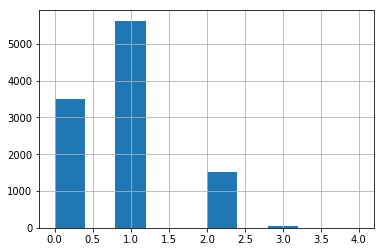

In [46]:
new_data["Total_Stops"].hist()

**NOTE**
- **Numerical** : Line plot
- **Nominal categorical** : Bar Plot
- **Ordinal Categorical**: Histogram

So, you can figure out, why I plotted a histogram for the Total_Stops feature.

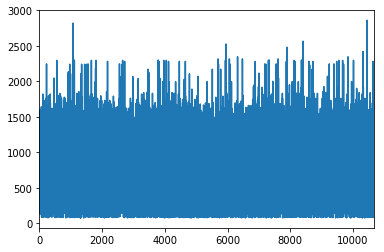

In [47]:
new_data["Minutes"].plot()

**Comments**: As we can see, the plot for Minutes is highly noisy. <br>
So, we should try to create bins and plot it to de-noise it. <br>
Therefore, let us try Histogram (**Default bins are 10**)

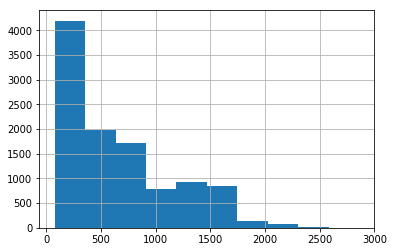

In [48]:
new_data["Minutes"].hist()

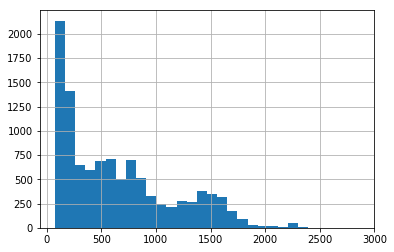

In [49]:
#Less bins => More information lost
#So let us try to increase bins
new_data["Minutes"].hist(bins=30)

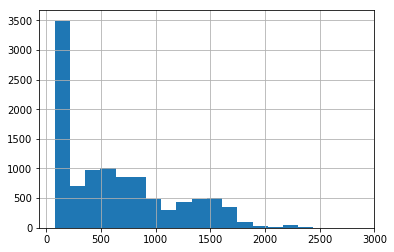

In [50]:
new_data["Minutes"].hist(bins=20)

**Minutes feature is highly right skewed with average at 520 minutes**

## Plotting Categorical Features

### Plotting Airline

In [51]:
new_data.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

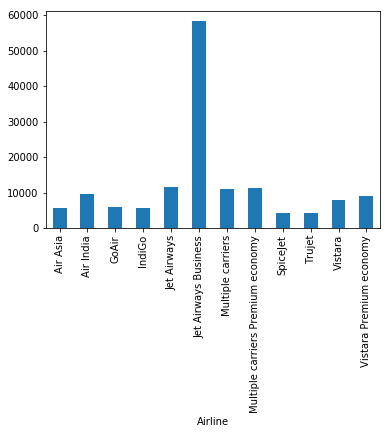

In [52]:
airline_grouped = new_data.groupby('Airline')['Price'].mean()

airline_grouped.plot.bar()

**Comments**: Jey Airaways Business has an extremely high price. <br>
In airlines feature, Jet Airways Buisness is highly determining of the price of flight

In [53]:
#Plotting again, without Jet Airways Business

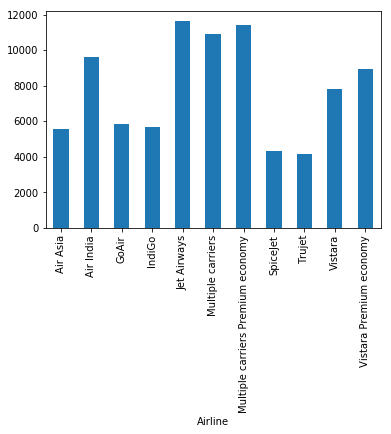

In [54]:
airlines_excluded_grouped = airline_grouped.drop(['Jet Airways Business'])
airlines_excluded_grouped.plot.bar()

**Comment**: Not much can be inferred.

### Checking Prices Monthly

In [55]:
new_data['Dep_Time'] = pd.to_datetime(new_data['Dep_Time'])

In [56]:
new_data.groupby(new_data["Dep_Time"].dt.month)["Price"].mean()

Dep_Time
1     10492.642791
3      8433.839891
4      5230.860849
5      9361.077628
6      9214.964905
9      9551.474395
12     9110.774295
Name: Price, dtype: float64

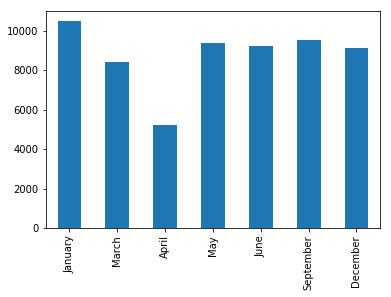

In [57]:
month_average = new_data.groupby(new_data["Dep_Time"].dt.month)["Price"].mean()
month_average.index = ["January", "March", "April", "May", "June", "September", "December"]
month_average.plot.bar()

**Comments**: Prices dipped in **April**. Highest in **January** <br>
**IMPORTANT: No data given for February, June, July, August, October and November**

### Is there a relation between the Day of the ticket booked?

In [58]:
new_data.groupby(new_data["Dep_Time"].dt.weekday_name)["Price"].mean()

Dep_Time
Friday       8556.502220
Monday       9721.101945
Saturday     8894.375727
Sunday       9556.827684
Thursday     9805.088646
Tuesday      8960.452265
Wednesday    7996.290807
Name: Price, dtype: float64

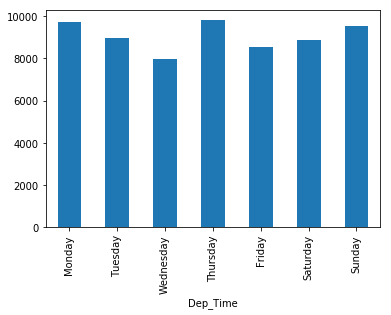

In [59]:
days = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_grouped = new_data.groupby(new_data["Dep_Time"].dt.weekday_name)["Price"].mean().reindex(days)
weekday_grouped.plot.bar()

**Comments**: <br>
Sunday, Monday and Thursday one of the highest. <br>
Prices dip from Monday to Wednesday and increases from Friday to Sunday

## Is there any relation between the day of the month the ticket is booked?

In [60]:
new_data.groupby(new_data["Dep_Time"].dt.day)["Price"].mean()

Dep_Time
3     13294.191036
4      6120.395420
5      8778.854167
6      9305.855956
15     8127.810976
18     8671.573317
21     8351.760576
24     8399.446768
27     8204.128319
Name: Price, dtype: float64

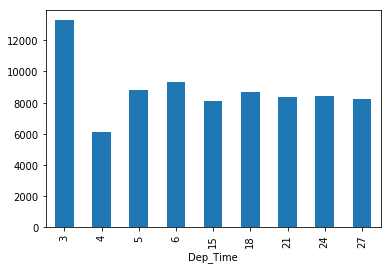

In [61]:
day_grouped = new_data.groupby(new_data["Dep_Time"].dt.day)["Price"].mean()
day_grouped.plot.bar()

## Is there a relation between the time of the day the ticket is booked?

In [62]:
times = new_data["Dep_Time"].dt.time.values

In [63]:
times

array([datetime.time(22, 20), datetime.time(5, 50), datetime.time(9, 25),
       ..., datetime.time(8, 20), datetime.time(11, 30),
       datetime.time(10, 55)], dtype=object)

**Comments**: <br>
Only 9 days data from 6 months given <br>
The tickets are booked highest on 3rd

## Can we see any relation with Additional Info?

In [64]:
new_data.groupby('Additional_Info')['Price'].mean()

Additional_Info
1 Long layover                  22109.631579
1 Short layover                 26743.000000
2 Long layover                  26480.000000
Business class                  56811.250000
Change airports                 16800.714286
In-flight meal not included      9471.834511
No check-in baggage included     3645.156250
No info                          9140.926090
Red-eye flight                  10873.000000
Name: Price, dtype: float64

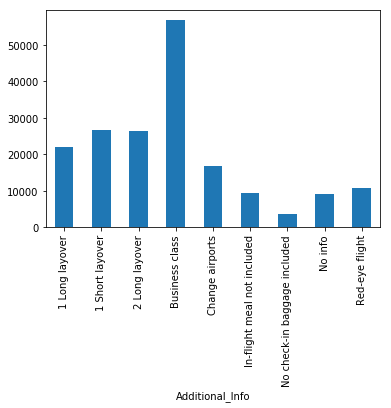

In [65]:
info_grouped = new_data.groupby('Additional_Info')['Price'].mean()
info_grouped.plot.bar()

**Comments**: Busines class plays an important role.

## Does the minutes of Flight affect the price?

In [66]:
new_data["Minutes"].values.max()

2860

In [67]:
new_data["Minutes"].values.min()

75

In [68]:
NUM_BINS = (2860 - 75)//300
bins = np.linspace(75,2860,NUM_BINS) #Bins in the interval of 5 hours (300 mins)
hours_df = pd.cut(new_data['Minutes'], bins)

In [69]:
hours_df

0           (75.0, 423.125]
1         (423.125, 771.25]
2        (1119.375, 1467.5]
3           (75.0, 423.125]
4           (75.0, 423.125]
5           (75.0, 423.125]
6        (771.25, 1119.375]
7        (1119.375, 1467.5]
8        (1467.5, 1815.625]
9         (423.125, 771.25]
10       (771.25, 1119.375]
11          (75.0, 423.125]
12          (75.0, 423.125]
13        (423.125, 771.25]
14          (75.0, 423.125]
15       (1467.5, 1815.625]
16          (75.0, 423.125]
17       (1119.375, 1467.5]
18       (1119.375, 1467.5]
19       (1119.375, 1467.5]
20          (75.0, 423.125]
21       (771.25, 1119.375]
22          (75.0, 423.125]
23          (75.0, 423.125]
24       (771.25, 1119.375]
25       (771.25, 1119.375]
26          (75.0, 423.125]
27          (75.0, 423.125]
28          (75.0, 423.125]
29          (75.0, 423.125]
                ...        
10653    (1119.375, 1467.5]
10654       (75.0, 423.125]
10655       (75.0, 423.125]
10656       (75.0, 423.125]
10657    (771.25, 11

In [70]:
new_data.groupby(hours_df)['Price'].mean()

Minutes
(75.0, 423.125]         6054.689157
(423.125, 771.25]      11134.966219
(771.25, 1119.375]     11035.499331
(1119.375, 1467.5]     12055.007380
(1467.5, 1815.625]     11617.182119
(1815.625, 2163.75]    12496.873563
(2163.75, 2511.875]    12127.000000
(2511.875, 2860.0]     16310.250000
Name: Price, dtype: float64

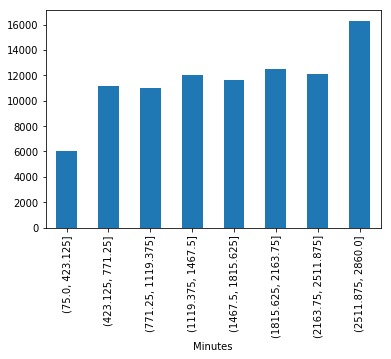

In [71]:
new_data.groupby(hours_df)['Price'].mean().plot.bar()

**Comments** The price generally increases with increase in minutes

In [72]:
new_data[["Minutes", "Price"]].corr()

,Minutes,Price
Minutes,1.000000,0.506495
Price,0.506495,1.000000


**Comment**: The minutes and price has a correlation of 0.5

## Most Important: Does Source and Destination matters?

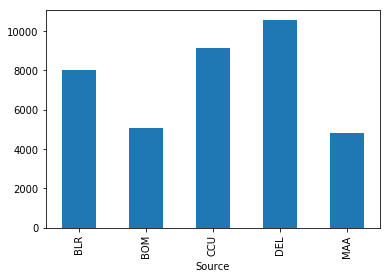

In [73]:
source_grouped = new_data.groupby('Source')["Price"].mean()
source_grouped.plot.bar()

**Comment**: Flights leaving from Delhi and CCU have a higher rate in general

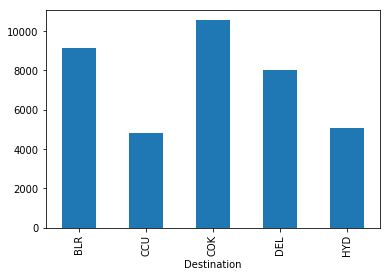

In [74]:
dest_grouped = new_data.groupby('Destination')["Price"].mean()
dest_grouped.plot.bar()

## Building the Model (The Meat of the Problem)

In [75]:
new_data.head()

,Airline,Source,Destination,Dep_Time,Minutes,Total_Stops,Additional_Info,Price,Stop_1,Stop_2,Stop_3,Stop_4
0,IndiGo,BLR,DEL,2019-03-24 22:20:00,170,0,No info,3897,NaN,NaN,NaN,NaN
1,Air India,CCU,BLR,2019-01-05 05:50:00,445,2,No info,7662,IXR,BBI,NaN,NaN
2,Jet Airways,DEL,COK,2019-09-06 09:25:00,1140,2,No info,13882,LKO,BOM,NaN,NaN
3,IndiGo,CCU,BLR,2019-12-05 18:05:00,325,1,No info,6218,NAG,NaN,NaN,NaN
4,IndiGo,BLR,DEL,2019-01-03 16:50:00,285,1,No info,13302,NAG,NaN,NaN,NaN


**Comment**: Now, we will split Dep_Time into different columns as: Day, Month and Hour

- The **Day (Mon, Tue, Wed, etc)** features affects the prices (graph above)
- The **Month (Jan, March, etc)** feature also affects the prices

In [76]:
#Creating a new dataframe
temp_df = new_data.copy()
temp_df["Day"] = new_data["Dep_Time"].dt.weekday_name.values
temp_df["Month"] = new_data["Dep_Time"].dt.month.values
temp_df.drop(labels=["Dep_Time"], axis = 'columns', inplace = True)
temp_df.head()

,Airline,Source,Destination,Minutes,Total_Stops,Additional_Info,Price,Stop_1,Stop_2,Stop_3,Stop_4,Day,Month
0,IndiGo,BLR,DEL,170,0,No info,3897,NaN,NaN,NaN,NaN,Sunday,3
1,Air India,CCU,BLR,445,2,No info,7662,IXR,BBI,NaN,NaN,Saturday,1
2,Jet Airways,DEL,COK,1140,2,No info,13882,LKO,BOM,NaN,NaN,Friday,9
3,IndiGo,CCU,BLR,325,1,No info,6218,NAG,NaN,NaN,NaN,Thursday,12
4,IndiGo,BLR,DEL,285,1,No info,13302,NAG,NaN,NaN,NaN,Thursday,1


# One- Hot Encoding

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
categorical_features = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Stop_1', 
                                            'Stop_2', 'Stop_3', 'Stop_4', 'Day', 'Month']

In [102]:
temp_df.fillna(0, inplace = True)

In [103]:
temp_df.head()

,Airline,Source,Destination,Minutes,Total_Stops,Additional_Info,Price,Stop_1,Stop_2,Stop_3,Stop_4,Day,Month
0,IndiGo,BLR,DEL,170,0,No info,3897,0,0,0,0,Sunday,3
1,Air India,CCU,BLR,445,2,No info,7662,IXR,BBI,0,0,Saturday,1
2,Jet Airways,DEL,COK,1140,2,No info,13882,LKO,BOM,0,0,Friday,9
3,IndiGo,CCU,BLR,325,1,No info,6218,NAG,0,0,0,Thursday,12
4,IndiGo,BLR,DEL,285,1,No info,13302,NAG,0,0,0,Thursday,1


In [104]:
one_hot = pd.get_dummies(temp_df[categorical_features])

In [105]:
one_hot.head()

,Month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Stop_3_ TRV,Stop_4_0,Stop_4_ VGA,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,3,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,9,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,12,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [106]:
one_hot.shape

(10683, 118)

In [107]:
one_hot_df = pd.concat([temp_df, one_hot], axis = 1)

In [108]:
one_hot_df.drop(labels = categorical_features, axis = 'columns', inplace = True)

In [109]:
one_hot_df.head()

,Minutes,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Stop_3_ TRV,Stop_4_0,Stop_4_ VGA,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,170,0,3897,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,445,2,7662,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1140,2,13882,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,325,1,6218,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,285,1,13302,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Training and Validation Set

In [110]:
y = one_hot_df["Price"].values
X = one_hot_df.drop(labels= ['Price'], axis = 'columns')

In [111]:
X.shape, y.shape

((10683, 119), (10683,))

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [113]:
X_train.shape, y_train.shape

((8012, 119), (8012,))

In [114]:
X_val.shape, y_val.shape

((2671, 119), (2671,))

## Model 1: RandomForestRegression

**NOTE: First we compare the scores with the default settings**

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rfg = RandomForestRegressor()

In [117]:
rfg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
rfg.score(X_val, y_val)

0.7431274972761146

In [124]:
rfg.score(X_train, y_train)

0.8971709090547111

## Model 2: Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lnr = LinearRegression()

In [122]:
lnr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
lnr.score(X_val, y_val)

0.6845984423412453

In [125]:
lnr.score(X_train, y_train)

0.7308053526109441

## Model3: Ridge Regression

In [126]:
from sklearn.linear_model import Ridge

In [127]:
rdg = Ridge()

In [128]:
rdg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
rdg.score(X_val, y_val)

0.6866347644494295

In [130]:
rdg.score(X_train, y_train)

0.7295772273575897

## Model4: Lasso

In [131]:
from sklearn.linear_model import Lasso

In [132]:
lasso = Lasso()

In [133]:
lasso.fit(X_train, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
lasso.score(X_val, y_val)

0.6862892361822374

In [135]:
lasso.score(X_train, y_train)

0.7284127476579624

## Model5: SVM Regression

In [136]:
from sklearn.svm import SVR

In [137]:
svr = SVR()

In [138]:
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [139]:
svr.score(X_val, y_val)

0.04068057802945446

In [140]:
svr.score(X_train, y_train)

0.03836565926263613

## Let's explore RandomForestRegressor a bit

In [142]:
RFnew = RandomForestRegressor(n_estimators=20)

In [143]:
RFnew.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [144]:
RFnew.score(X_val, y_val)

0.7429445957409674

In [145]:
RFnew.score(X_train, y_train)

0.9031524649421687

In [299]:
RFnew = RandomForestRegressor(n_estimators=200, max_depth = 20,min_samples_split = 60, max_features='sqrt',
                              min_samples_leaf = 2)
RFnew.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=60,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [300]:
RFnew.score(X_val, y_val)

0.7498683205324598

In [301]:
RFnew.score(X_train, y_train)

0.7587905337323461

#### NOTE: The above model was come up with a lot of trials. (Overfits very less)